In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the dataset
data_dir = '/content/drive/MyDrive/dataset/train'


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 508 images belonging to 4 classes.
Found 125 images belonging to 4 classes.


In [ ]:
def build_and_train_model(base_model, model_name):
    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.005))(x)
    x = Dropout(0.1)(x)
    output = Dense(train_data.num_classes, activation='softmax')(x)

    # Create the full model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)
    checkpoint = ModelCheckpoint(f'{model_name}_best_model.keras', monitor='val_loss', save_best_only=True)

    # Train the model
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=10,
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )

    # Save the final model
    model.save(f'{model_name}_final_model.keras')

    return model, history


In [ ]:
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
vgg_model, vgg_history = build_and_train_model(base_vgg, "VGG16")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 501s 27s/step - accuracy: 0.2177 - loss: 2.7006 - val_accuracy: 0.2480 - val_loss: 2.4651 - learning_rate: 1.0000e-04
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 426s 26s/step - accuracy: 0.2339 - loss: 2.4511 - val_accuracy: 0.2480 - val_loss: 2.3530 - learning_rate: 1.0000e-04
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 433s 26s/step - accuracy: 0.2352 - loss: 2.3755 - val_accuracy: 0.2800 - val_loss: 2.3140 - learning_rate: 1.0000e-04
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 449s 28s/step - accuracy: 0.2889 - loss: 2.3050 - val_accuracy: 0.3760 - val_loss: 2.2842 - learning_rate: 1.0000e-04
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 417s 26s/step - accuracy: 0.3219 - loss: 2.2783 - val_accuracy: 0.3280 - val_loss: 2.2442 - learning_rate: 1.0000e-04
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 419s 26s/step - accuracy: 0.3057 - loss: 2.2381 - val_accuracy: 0.3360 - val_loss: 2.2099 - learning_rate: 1.0000e-04
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 429s 26s/step - accuracy: 0.3079 - lo

In [ ]:
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
resnet_model, resnet_history = build_and_train_model(base_resnet, "ResNet50")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 153s 9s/step - accuracy: 0.2412 - loss: 2.6979 - val_accuracy: 0.2720 - val_loss: 2.5109 - learning_rate: 1.0000e-04
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 139s 8s/step - accuracy: 0.2710 - loss: 2.5166 - val_accuracy: 0.2240 - val_loss: 2.4210 - learning_rate: 1.0000e-04
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 149s 9s/step - accuracy: 0.2520 - loss: 2.4143 - val_accuracy: 0.2160 - val_loss: 2.3358 - learning_rate: 1.0000e-04
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 189s 8s/step - accuracy: 0.2524 - loss: 2.3373 - val_accuracy: 0.2720 - val_loss: 2.2584 - learning_rate: 1.0000e-04
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 153s 9s/step - accuracy: 0.2692 - loss: 2.2739 - val_accuracy: 0.1920 - val_loss: 2.1880 - learning_rate: 1.0000e-04
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 138s 8s/step - accuracy: 0.2506 - loss: 2.1678 - val_accuracy: 0.2560 - val_loss: 2.1276 - learning_rate: 1.0000e-04
Epoch 7/10
16/16 ━━

In [ ]:
base_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
mobilenet_model, mobilenet_history = build_and_train_model(base_mobilenet, "MobileNet")


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.2473 - loss: 2.8830 - val_accuracy: 0.2880 - val_loss: 2.6199 - learning_rate: 1.0000e-04
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.2981 - loss: 2.6478 - val_accuracy: 0.3120 - val_loss: 2.4531 - learning_rate: 1.0000e-04
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3243 - loss: 2.5201 - val_accuracy: 0.3840 - val_loss: 2.4202 - learning_rate: 1.0000e-04
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.3890 - loss: 2.3931 - val_accuracy: 0.3840 - val_loss: 2.4089 - learning_rate: 1.0000e-04
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.4617 - loss: 2.2737 - val_accuracy: 0.4320 - val_loss: 2.3474 - learning_rate: 1.0000e-04
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.4751 - loss: 2.2621 - val_accuracy: 0.3840 - val_loss: 2.3421 - learning_rate: 1.0000e-04
Epoch 7/10
16/16 ━━━━━━━━

In [ ]:
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
inception_model, inception_history = build_and_train_model(base_inception, "InceptionV3")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 111s 6s/step - accuracy: 0.2900 - loss: 2.6732 - val_accuracy: 0.3280 - val_loss: 2.5316 - learning_rate: 1.0000e-04
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 97s 6s/step - accuracy: 0.3512 - loss: 2.5520 - val_accuracy: 0.3520 - val_loss: 2.5602 - learning_rate: 1.0000e-04
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.4228 - loss: 2.4414 - val_accuracy: 0.4080 - val_loss: 2.4836 - learning_rate: 1.0000e-04
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.4291 - loss: 2.3960 - val_accuracy: 0.3200 - val_loss: 2.4659 - learning_rate: 1.0000e-04
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 96s 6s/step - accuracy: 0.5009 - loss: 2.3018 - val_accuracy: 0.3840 - val_loss: 2.4531 - learning_rate: 1.0000e-04
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 102s 6s/step - accuracy: 0.4882 - loss: 2.3006 - val_accuracy: 0.3600 - val_loss: 2.4703 - learning_rate: 1.0000e-04
Epoch 7/10
16/16 ━━━━

In [ ]:
base_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
efficientnet_model, efficientnet_history = build_and_train_model(base_efficientnet, "EfficientNetB0")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.2334 - loss: 2.5398 - val_accuracy: 0.2480 - val_loss: 2.4869 - learning_rate: 1.0000e-04
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.2484 - loss: 2.4729 - val_accuracy: 0.2720 - val_loss: 2.4240 - learning_rate: 1.0000e-04
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.2616 - loss: 2.4087 - val_accuracy: 0.2720 - val_loss: 2.3645 - learning_rate: 1.0000e-04
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.2509 - loss: 2.3524 - val_accuracy: 0.2720 - val_loss: 2.3081 - learning_rate: 1.0000e-04
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.2825 - loss: 2.2927 - val_accuracy: 0.2720 - val_loss: 2.2546 - learning_rate: 1.0000e-04
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.2560 - loss: 2.2435 - val_accuracy: 0.2720 - val_loss: 2.2044 - learning_rate: 1.0000e-04
Epoch 7/10
16/16 ━━━━━━━━

In [ ]:
def plot_history(history, model_name):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


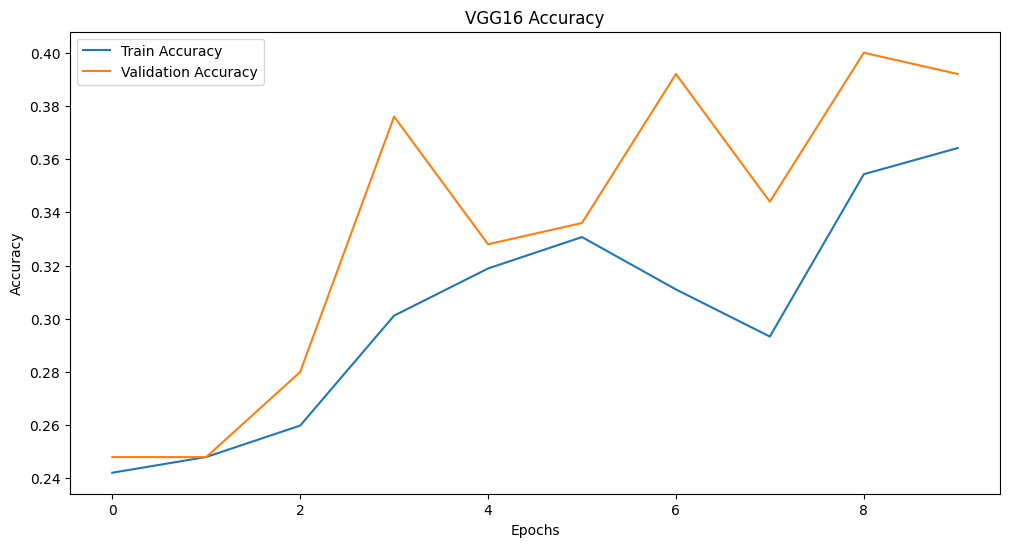

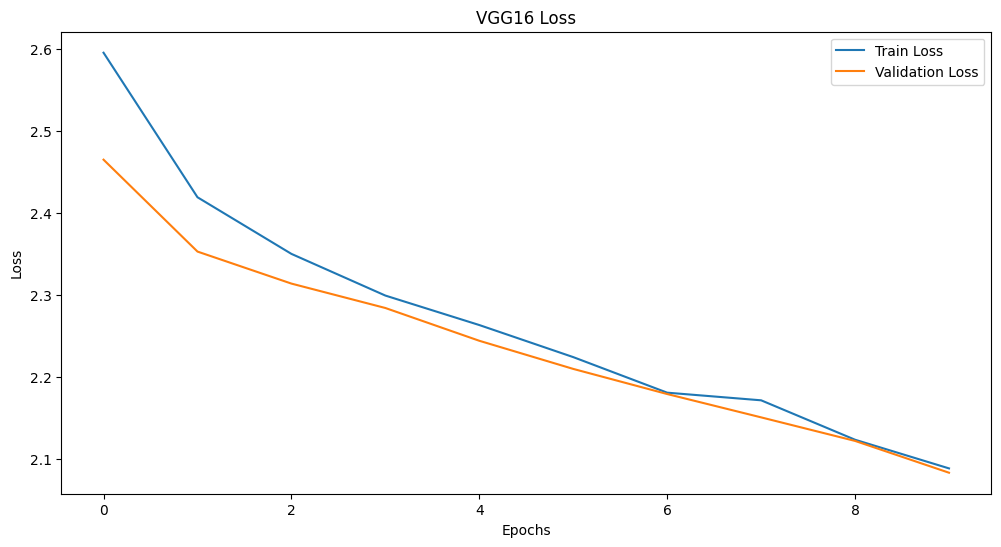

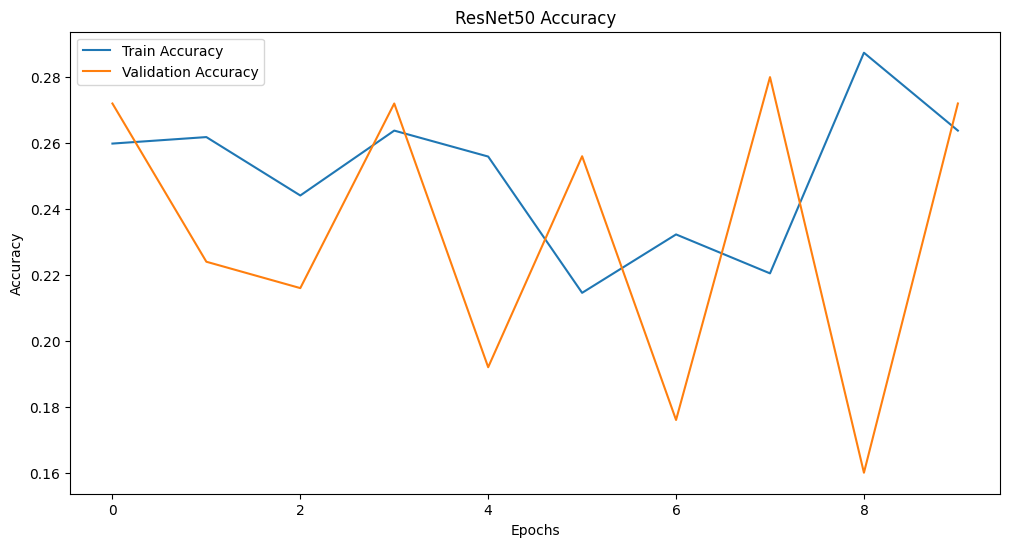

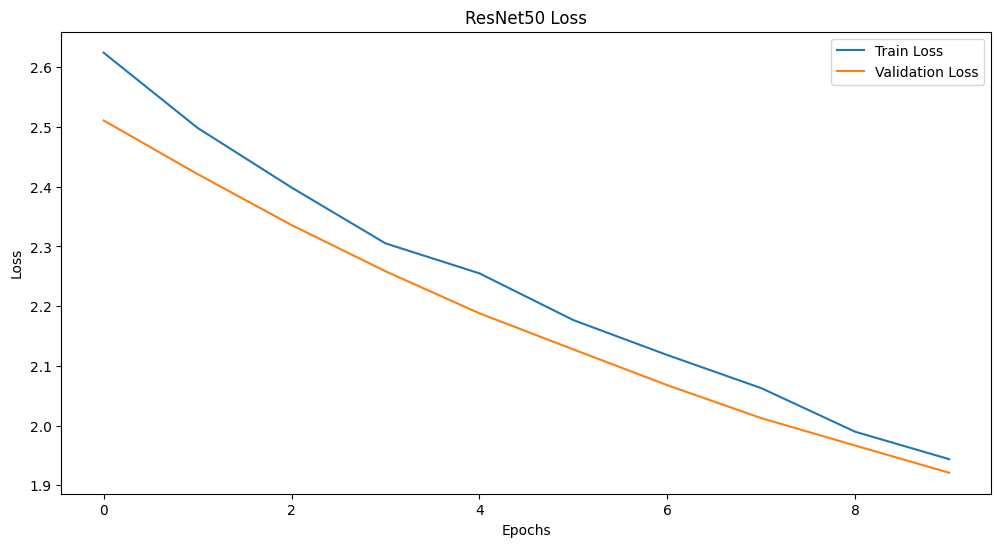

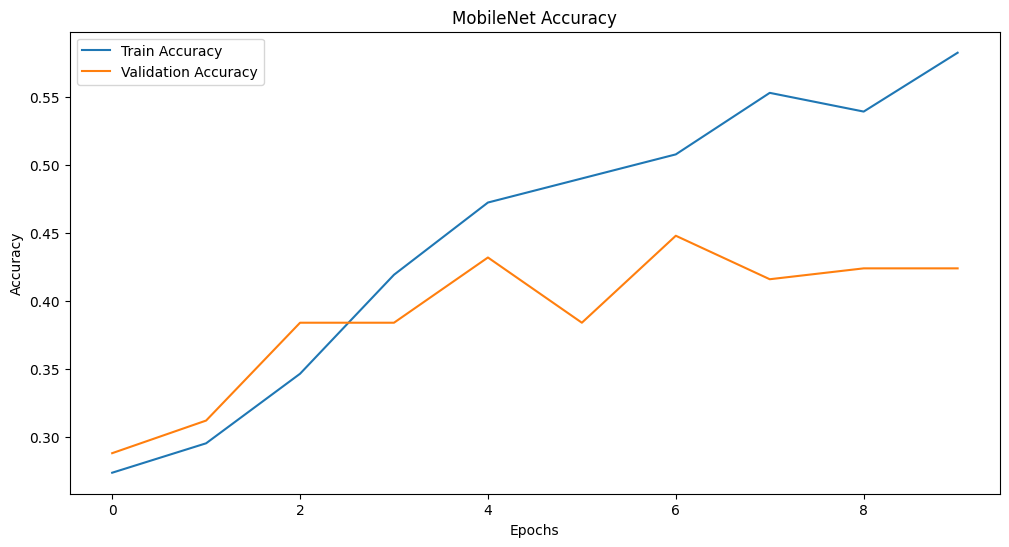

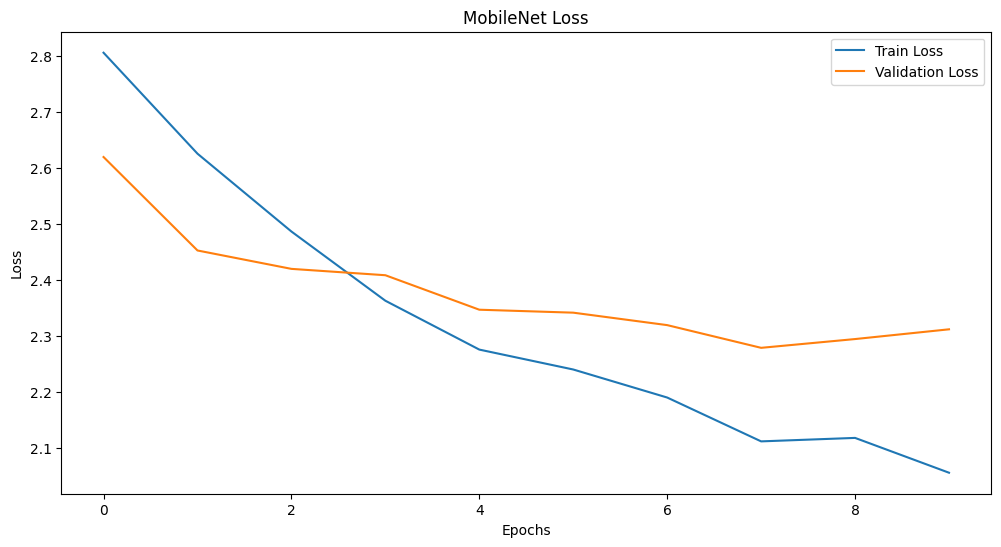

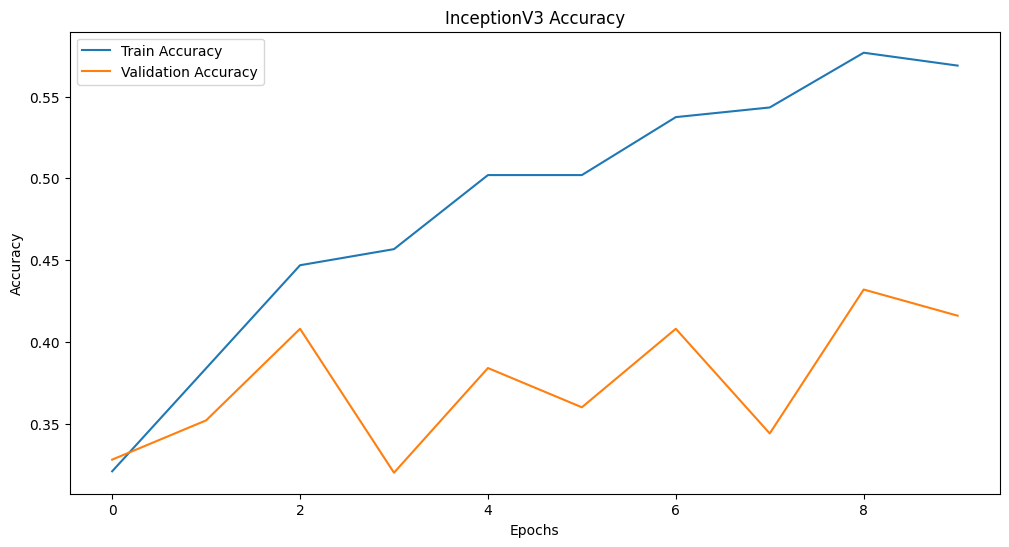

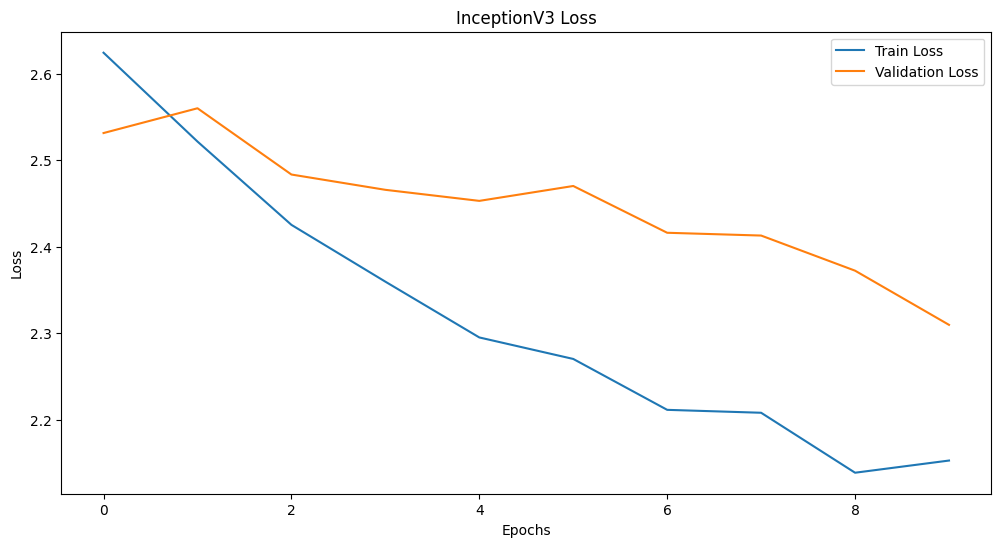

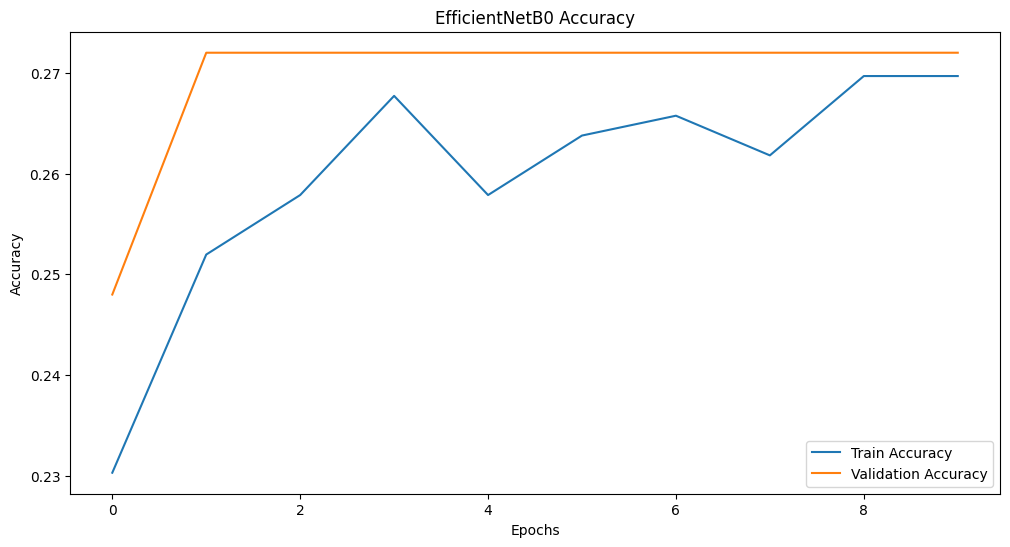

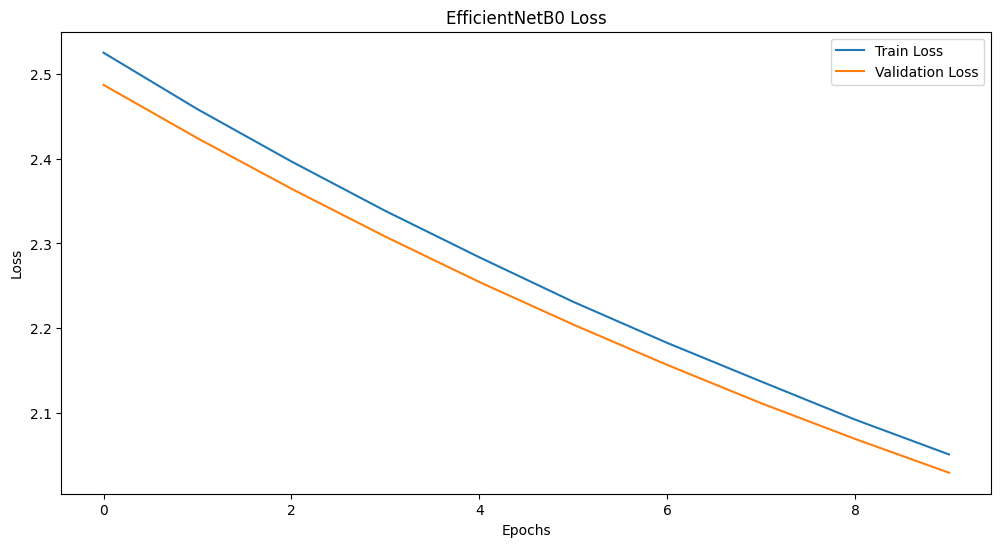

In [ ]:
plot_history(vgg_history, "VGG16")
plot_history(resnet_history, "ResNet50")
plot_history(mobilenet_history, "MobileNet")
plot_history(inception_history, "InceptionV3")
plot_history(efficientnet_history, "EfficientNetB0")


In [ ]:
test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

vgg_eval = vgg_model.evaluate(test_data)
resnet_eval = resnet_model.evaluate(test_data)
mobilenet_eval = mobilenet_model.evaluate(test_data)
inception_eval = inception_model.evaluate(test_data)
efficientnet_eval = efficientnet_model.evaluate(test_data)

print("VGG16 Accuracy:", vgg_eval[1])
print("ResNet50 Accuracy:", resnet_eval[1])
print("MobileNet Accuracy:", mobilenet_eval[1])
print("InceptionV3 Accuracy:", inception_eval[1])
print("EfficientNetB0 Accuracy:", efficientnet_eval[1])


Found 633 images belonging to 4 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 410s 20s/step - accuracy: 0.3137 - loss: 2.1091
20/20 ━━━━━━━━━━━━━━━━━━━━ 132s 7s/step - accuracy: 0.2795 - loss: 1.9208
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4853 - loss: 2.2152
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.4661 - loss: 2.2984
20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.2813 - loss: 2.0444
VGG16 Accuracy: 0.415481835603714
ResNet50 Accuracy: 0.2685624063014984
MobileNet Accuracy: 0.5624012351036072
InceptionV3 Accuracy: 0.5671405792236328
EfficientNetB0 Accuracy: 0.2685624063014984


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load dataset
# Assuming dataset is in a folder with subfolders for each class
data_dir = '/content/drive/MyDrive/dataset/train'
img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Build a simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25
)


Found 508 images belonging to 4 classes.
Found 125 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2544 - loss: 2.0671 - val_accuracy: 0.2480 - val_loss: 1.3884
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3786 - loss: 1.3508 - val_accuracy: 0.2400 - val_loss: 1.4600
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4815 - loss: 1.1945 - val_accuracy: 0.2880 - val_loss: 1.5237
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6569 - loss: 0.9659 - val_accuracy: 0.2560 - val_loss: 1.8084
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7698 - loss: 0.6302 - val_accuracy: 0.2880 - val_loss: 1.9851
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9466 - loss: 0.2340 - val_accuracy: 0.2960 - val_loss: 2.9818
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9634 - loss: 0.1800 - val_accuracy: 0.2480 - val_loss: 2.3288
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9964 - loss: 0.0474 - val_accuracy: 0.2880 - val_loss: 3.0686
Epo

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

# Add dropout layers to prevent overfitting
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)


Found 508 images belonging to 4 classes.
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2450 - loss: 2.4281 - val_accuracy: 0.2480 - val_loss: 1.3839
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.2677 - loss: 1.3854 - val_accuracy: 0.2240 - val_loss: 1.3853
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2912 - loss: 1.3844 - val_accuracy: 0.2240 - val_loss: 1.3837
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.2568 - loss: 1.3727 - val_accuracy: 0.2720 - val_loss: 1.3776
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2896 - loss: 1.3823 - val_accuracy: 0.2240 - val_loss: 1.3768
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3070 - loss: 1.3665 - val_accuracy: 0.2400 - val_loss: 1.4107
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2546 - loss: 1.3806 - val_accuracy: 0.2400 - val_loss: 1.3755
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3309 - loss: 

In [ ]:
# Use a pre-trained model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Initial training
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 985ms/step - accuracy: 0.3052 - loss: 1.7778 - val_accuracy: 0.3120 - val_loss: 1.4728
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 787ms/step - accuracy: 0.3758 - loss: 1.5518 - val_accuracy: 0.3520 - val_loss: 1.4390
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 865ms/step - accuracy: 0.3533 - loss: 1.5155 - val_accuracy: 0.3600 - val_loss: 1.3851
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 846ms/step - accuracy: 0.4652 - loss: 1.2602 - val_accuracy: 0.3680 - val_loss: 1.3879
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 843ms/step - accuracy: 0.4087 - loss: 1.3332 - val_accuracy: 0.3520 - val_loss: 1.3594
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 764ms/step - accuracy: 0.4559 - loss: 1.2699 - val_accuracy: 0.3520 - val_loss: 1.3554
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 775ms/step - accuracy: 0.4837 - loss: 1.1805 - val_accuracy: 0.3680 - val_loss: 1.3501
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 852ms/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalize pixel values
    rotation_range=30,             # Random rotation
    width_shift_range=0.2,         # Horizontal shift
    height_shift_range=0.2,        # Vertical shift
    shear_range=0.2,               # Shearing
    zoom_range=0.2,                # Random zoom
    horizontal_flip=True,          # Horizontal flip
    fill_mode='nearest'            # Fill pixels after transformation
)

# Validation Data (Only Rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create Data Generators
train_generator = train_datagen.flow_from_directory(
    data_dir,                     # Path to training data
    target_size=(224, 224),        # Resize images
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,                       # Path to validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load Pre-trained Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze Base Layers
for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes
])

# Compile Model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[lr_scheduler, early_stopping]
)

# Fine-Tune Model
for layer in base_model.layers[-8:]:  # Unfreeze last few layers
    layer.trainable = True

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[lr_scheduler, early_stopping]
)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Compute Class Weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Train Model with Class Weights
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = LearningRateScheduler(scheduler)


In [ ]:
optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)


In [ ]:
preds_vgg = model_vgg.predict(test_data)
preds_resnet = model_resnet.predict(test_data)
preds_combined = (preds_vgg + preds_resnet) / 2
final_preds = np.argmax(preds_combined, axis=1)
